In [16]:
%pylab inline  

from numpy.random import seed
import matplotlib
import matplotlib.pyplot as plt
import os

Populating the interactive namespace from numpy and matplotlib


/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
from skopt import gp_minimize

def f(x):
    """The function to predict."""
    return -(2*((x[0]-3)*np.sin((x[0]-3))) + 2 + 0.5*x[0])


In [24]:
res = gp_minimize(f,  [(0, 6.0)], n_calls = 2, n_random_starts=1, x0=[0.5], noise = 1e-10)

In [26]:
res

          fun: -5.242360720519782
    func_vals: array([-5.24236072, -4.84816815])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1e-10),
                         n_restarts_optimizer=2, noise=1e-10, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=1108738065)]
 random_state: RandomState(MT19937) at 0x7F0D80098888
        space: Space([Real(low=0, high=6.0, prior='uniform', transform='normalize')])
        specs: {'args': {'n_jobs': 1, 'kappa': 1.96, 'xi': 0.01, 'n_restarts_optimizer': 5, 'n_points': 10000, 'callback': None, 'verbose': False, 'random_state': RandomState(MT19937) at 0x7F0D80098888, 'y0': None, 'x0': [0.5], 'acq_optimizer': 'auto', 'acq_func': 'gp_hedge', 'n_random_starts': 1, 'n_calls': 2, 'base_estimator': GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_s

TypeError: 'AxesSubplot' object is not subscriptable

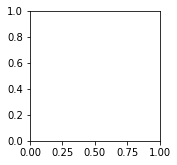

In [25]:
from skopt.plots import *
plot_objective(res)

In [22]:
res

          fun: -5.7216593621710015
    func_vals: array([-5.24236072, -5.72165936])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1e-10),
                         n_restarts_optimizer=2, noise=1e-10, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=293835151)]
 random_state: RandomState(MT19937) at 0x7F0D80098888
        space: Space([Real(low=0, high=6.0, prior='uniform', transform='normalize')])
        specs: {'args': {'n_jobs': 1, 'kappa': 1.96, 'xi': 0.01, 'n_restarts_optimizer': 5, 'n_points': 10000, 'callback': None, 'verbose': False, 'random_state': RandomState(MT19937) at 0x7F0D80098888, 'y0': None, 'x0': [0.5], 'acq_optimizer': 'auto', 'acq_func': 'gp_hedge', 'n_random_starts': 1, 'n_calls': 2, 'base_estimator': GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_s

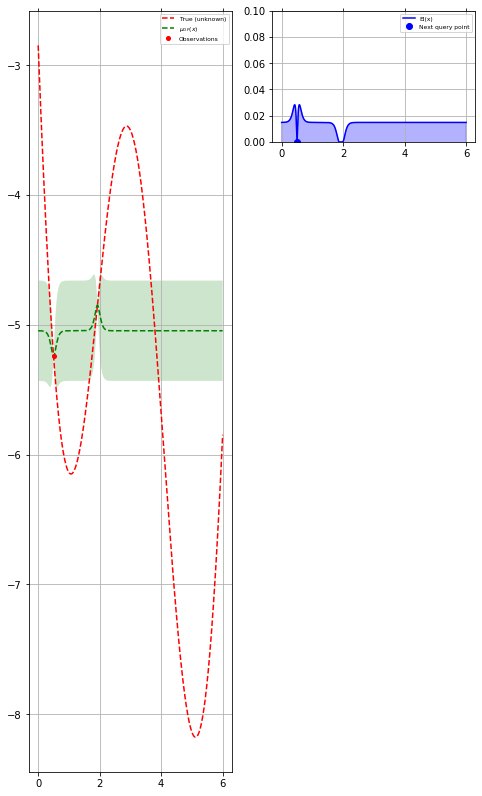

In [36]:
from skopt.acquisition import gaussian_ei

plt.rcParams["figure.figsize"] = (8, 14)

x = np.linspace(0, 6, 600).reshape(-1, 1)
x_gp = res.space.transform(x.tolist())
fx = np.array([f(x_i) for x_i in x])

noise_level = 0
# Plot the 5 iterations following the 5 random points
for n_iter in range(1):
    gp = res.models[n_iter]
    curr_x_iters = res.x_iters[:n_iter + 1]
    curr_func_vals = res.func_vals[:n_iter + 1]

    # Plot true function.
    plt.subplot(1, 2, 2*n_iter+1)
    plt.plot(x, fx, "r--", label="True (unknown)")
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([fx - 1.9600 * noise_level, 
                             fx[::-1] + 1.9600 * noise_level]),
             alpha=.2, fc="r", ec="None")

    # Plot GP(x) + contours
    y_pred, sigma = gp.predict(x_gp, return_std=True)
    plt.plot(x, y_pred, "g--", label=r"$\mu_{GP}(x)$")
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma, 
                             (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.2, fc="g", ec="None")

    # Plot sampled points
    plt.plot(curr_x_iters, curr_func_vals,
             "r.", markersize=8, label="Observations")

    # Adjust plot layout
    plt.grid()

    if n_iter == 0:
        plt.legend(loc="best", prop={'size': 6}, numpoints=1)

    if n_iter != 4:
        plt.tick_params(axis='x', which='both', bottom='off', 
                        top='off', labelbottom='off') 

    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    acq = gaussian_ei(x_gp, gp, y_opt=np.min(curr_func_vals))
    plt.plot(x, acq, "b", label="EI(x)")
    plt.fill_between(x.ravel(), -2.0, acq.ravel(), alpha=0.3, color='blue')

    next_x = res.x_iters[n_iter ]
    next_acq = gaussian_ei(res.space.transform([next_x]), gp, y_opt=np.min(curr_func_vals))
    plt.plot(next_x, next_acq, "bo", markersize=6, label="Next query point")

    # Adjust plot layout
    plt.ylim(0, 0.1)
    plt.grid()

    if n_iter == 0:
        plt.legend(loc="best", prop={'size': 6}, numpoints=1)

    if n_iter != 4:
        plt.tick_params(axis='x', which='both', bottom='off', 
                        top='off', labelbottom='off') 

plt.show()
